In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

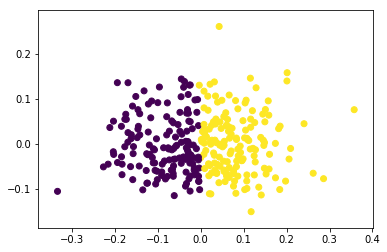

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99


In [3]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [4]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0    0    1
row_0          
0       12  154
1      137    0


# Drill: More clusters?

Your task is to take the  𝑘 -means code here and see what happens when you change the value of  𝑘 . What solution, if any, do you find most compelling? Does complexity start to become an issue with this data set? Play around a bit and write up your findings and your process to share with your mentor. Keep in mind that it may be possible to have a solution with more than two clusters that is still better at tracking the real binary outcome – two of those clusters may map to "heart disease" while the other maps to "no heart disease," for example.

In [15]:
accuracy=[]
    
for k in range(1,125):
    y_pred = KMeans(n_clusters=k, random_state=42).fit_predict(X_pca)
    
    correct=(sum(pd.crosstab(y_pred, y).apply(max,axis=1))/len(y_pred))*100
    accuracy.append(correct)

## Steps for assigning k

1. Open an empty list 'accurary' with = []
2. Use the *for* loop statement to assign ***k*** in a range. Above I used (1, 125) I was interested in seeing K starts to plataue off. 
3. Calculate predicted values "y_pred = KMeans(n_clusters=***k***, random_state=42).fit_predict(X_pca)" n_clusters needs to be assigned to ***k***
4. Crosstab: have it set to variable in this case correct
(sum(pd.crosstab(y_pred, y).apply(max,axis=1))/len(y_pred))*100

5. Closing the list 'accuracy' and append it with the 'correct' (crosstab results)

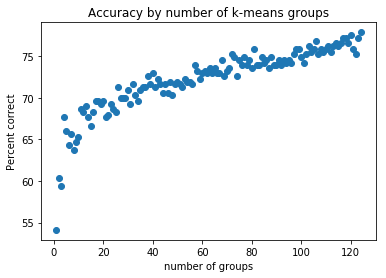

In [16]:
plt.scatter(range(1,125), accuracy)
plt.title('Accuracy by number of k-means groups')
plt.ylabel('Percent correct')
plt.xlabel('number of groups')
plt.show()

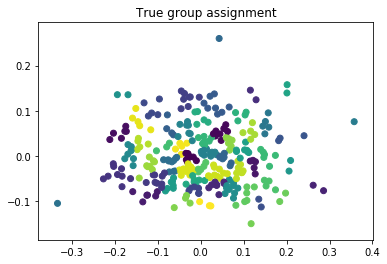

In [12]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.title('True group assignment')
plt.show()

*** PCA with all the group assignments plotted ***

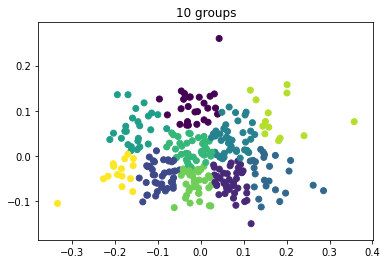

In [19]:
y_pred = KMeans(n_clusters=10, random_state=42).fit_predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.title('10 groups')
plt.show()

## When you increase the number of clusters directly increases the percent correct in groups. However, there is a point more increasing number of clusters does not have meaningful results. If you are dealing with Cancer treatments or Agriculture experimental watering treatments increasing the cluster size is not going to provide meaningful insights into the PCA. 

## Carefully choosing the ***K*** comes from knowing the dataset and domian knowledge. 

